In [0]:
#import of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE


In [3]:
#loading the data
from google.colab import files
uploaded = files.upload()

Saving Churn Modeling.csv to Churn Modeling.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Churn Modeling.csv']))

In [121]:
#creating a dummy variables from categorical features
geography = pd.get_dummies(data.loc[:,"Geography"],drop_first=True)
gender = pd.get_dummies(data.loc[:,"Gender"],drop_first=True)

data.drop(['Geography','Gender','Surname','CustomerId','RowNumber'],axis=1,inplace=True)

data = pd.concat([geography,gender,data],axis=1)
data.head()

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10,0


In [0]:
#separate input features and target

featuress = ['Germany', 'Spain', 'Male', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

X = data.loc[:, featuress] #inputs
y = data.loc[:,['Exited']].values #target variable

#splitting data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1590
           1       0.78      0.49      0.60       410

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8675
[[1534   56]
 [ 209  201]]


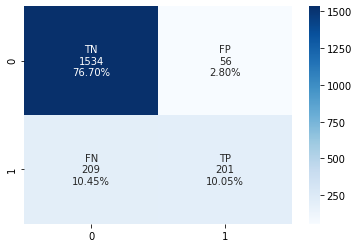

In [138]:
#RANDOM FOREST

clf=RandomForestClassifier(n_estimators = 100, random_state=27)

y_train = np.reshape(y_train,len(y_train),)
#fitting the model with data
clf.fit(X_train,y_train)

#predictions
y_pred=clf.predict(X_test)

#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cf_matrix)

group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


0.85600782328578


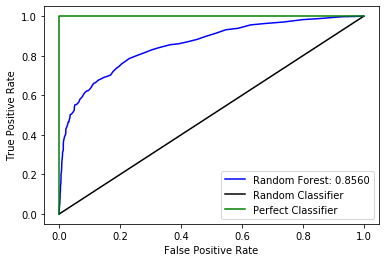

In [139]:
#AUC metrics
y_pred_p=clf.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)

plt.plot(fpr,tpr,'b-', label= 'Random Forest: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='Random Classifier')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='Perfect Classifier')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [125]:
print(y_train[y_train==1].shape)#minority
print(y_train[y_train==0].shape)#majority

#SMOTE, ratio = 0.5
sm = SMOTE(random_state=27, ratio=0.5)
X_train_s, y_train_s = sm.fit_sample(X_train, y_train.ravel())

print(y_train_s[y_train_s==1].shape)
print(y_train_s[y_train_s==0].shape)

(1627,)
(6373,)
(3186,)
(6373,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [126]:
#RANDOM FOREST

y_train = np.reshape(y_train,len(y_train),)
#fitting the model with data
clf.fit(X_train_s,y_train_s)

#predictions
y_pred_s=clf.predict(X_test)

#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test,y_pred_s))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_s)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1590
           1       0.74      0.52      0.61       410

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy: 0.8635
[[1515   75]
 [ 198  212]]


0.8514250651940481


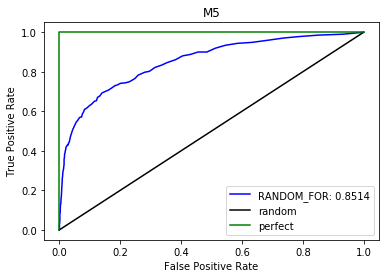

In [127]:
#AUC metrics
y_pred_p_s=clf.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p_s[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p_s[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)

plt.plot(fpr,tpr,'b-', label= 'RANDOM_FOR: %.4f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("M5")
plt.show()

In [128]:
print(y_train[y_train==1].shape)#minority
print(y_train[y_train==0].shape)#majority

#SMOTE, ratio = 1
sm = SMOTE(random_state=27, ratio=1)
X_train_s1, y_train_s1 = sm.fit_sample(X_train, y_train.ravel())

print(y_train_s1[y_train_s1==1].shape)
print(y_train_s1[y_train_s1==0].shape)

(1627,)
(6373,)
(6373,)
(6373,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [129]:
#RANDOM FOREST

y_train = np.reshape(y_train,len(y_train),)
#fitting the model with data
clf.fit(X_train_s1,y_train_s1)

#predictions
y_pred_s1=clf.predict(X_test)

#metrics - precision, recall, f1-score, accuracy
print(classification_report(y_test,y_pred_s1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s1))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_s1)
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1590
           1       0.74      0.54      0.62       410

    accuracy                           0.87      2000
   macro avg       0.81      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8655
[[1511   79]
 [ 190  220]]


0.8538272741217978


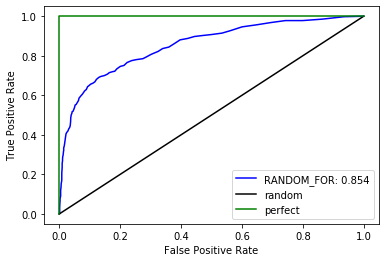

In [130]:
#AUC metrics
y_pred_p_s1=clf.predict_proba(X_test)
#y_test = np.reshape(y_test,len(y_test),)
#print(y_test.shape)
roc_auc = metrics.roc_auc_score(y_test, y_pred_p_s1[:,1])
print(roc_auc)

#plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p_s1[:,1])
#print(fpr)
#print(tpr)
#print(thresholds)

plt.plot(fpr,tpr,'b-', label= 'RANDOM_FOR: %.3f'%roc_auc)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()